# Analysis of results

Packages

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath('')).parent
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## Unimodal Phenotype Model

In [2]:
results_dir = os.path.join(BASE_DIR, 'results', 'pheno')
ab_stats = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

#### Antibiotic stats

In [3]:
ab_stats

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
0,AMP,26106,11605,14501,14722,11384,19361,9791,9570,0.741630,0.659954,0.843688,0.840654,0.739424
1,CTX,30469,27512,2957,27899,2570,29508,27225,2283,0.968460,0.772066,0.989568,0.888327,0.826126
2,GEN,35011,32221,2790,33015,1996,32799,31512,1287,0.936820,0.461290,0.977996,0.644790,0.537819
3,TOB,17846,16347,1499,16528,1318,17115,16072,1043,0.959038,0.695797,0.983177,0.791351,0.740504
4,CIP,37405,30147,7258,31996,5409,33366,29052,4314,0.892020,0.594379,0.963678,0.797560,0.681140
5,CAZ,33783,31013,2770,31046,2737,32878,30577,2301,0.973211,0.830686,0.985941,0.840701,0.835664
6,CRO,10939,9950,989,10047,892,10694,9876,818,0.977603,0.827098,0.992563,0.917040,0.869750
7,OFX,3609,2942,667,3064,545,3435,2916,519,0.951787,0.778111,0.991162,0.952294,0.856436
8,AMK,19228,19013,215,19228,0,19013,19013,0,0.988818,0.000000,1.000000,NaN,NaN
9,AMX,9238,4229,5009,4890,4348,6977,3429,3548,0.755250,0.708325,0.810830,0.816007,0.758363


**Fig 1**: Compare the accuracy of each antibiotic to the data imbalance

In [4]:
ab_stats.sort_values(by='accuracy', ascending=False)

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,sensitivity,specificity,precision,F1
14,COL,2791,2767,24,2791,0,2767,2767,0,0.991401,0.000000,1.000000,NaN,NaN
8,AMK,19228,19013,215,19228,0,19013,19013,0,0.988818,0.000000,1.000000,NaN,NaN
6,CRO,10939,9950,989,10047,892,10694,9876,818,0.977603,0.827098,0.992563,0.917040,0.869750
13,FEP,7650,6912,738,6863,787,7465,6795,670,0.975817,0.907859,0.983073,0.851334,0.878689
5,CAZ,33783,31013,2770,31046,2737,32878,30577,2301,0.973211,0.830686,0.985941,0.840701,0.835664
1,CTX,30469,27512,2957,27899,2570,29508,27225,2283,0.968460,0.772066,0.989568,0.888327,0.826126
17,NET,792,755,37,739,53,766,734,32,0.967172,0.864865,0.972185,0.603774,0.711111
3,TOB,17846,16347,1499,16528,1318,17115,16072,1043,0.959038,0.695797,0.983177,0.791351,0.740504
10,LVX,7328,5727,1601,5855,1473,7004,5629,1375,0.955786,0.858838,0.982888,0.933469,0.894600
7,OFX,3609,2942,667,3064,545,3435,2916,519,0.951787,0.778111,0.991162,0.952294,0.856436


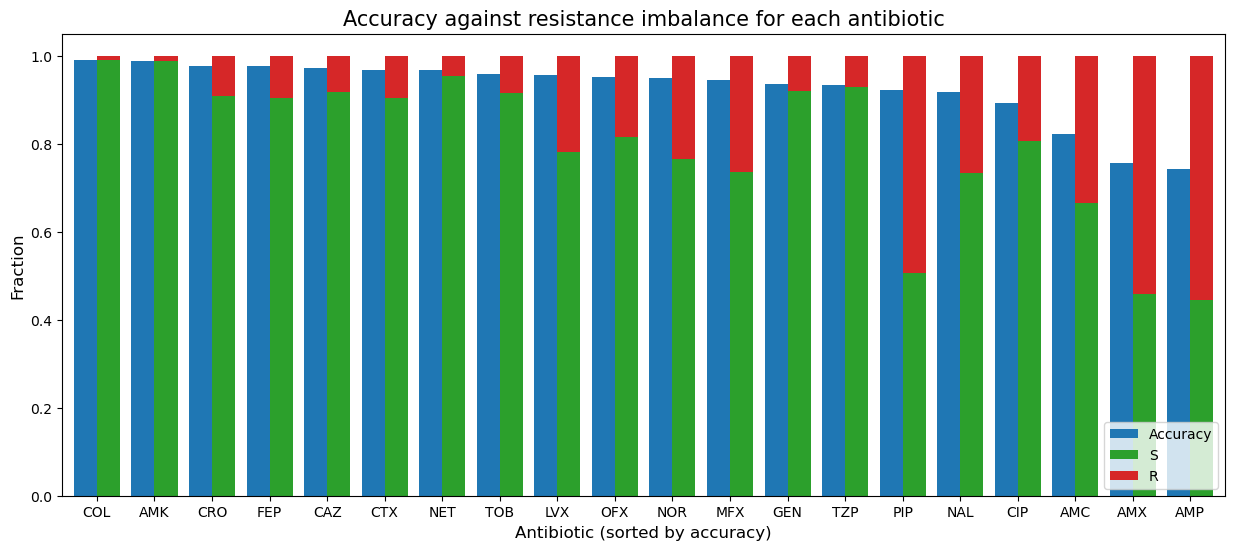

In [5]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats.set_index('antibiotic', inplace=True)

fig, ax = plt.subplots(figsize=(15, 6))
bar1 = sorted_ab_stats['accuracy'].plot.bar(rot=0, width=-0.4, align='edge', color='tab:blue', ax=ax)
bar2 = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
ax.set_title('Accuracy against resistance imbalance for each antibiotic', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.legend(labels=['Accuracy', 'S', 'R'], loc='lower right')   
plt.show()

**Fig 2**: Comparing distributions of predictions to true distributions

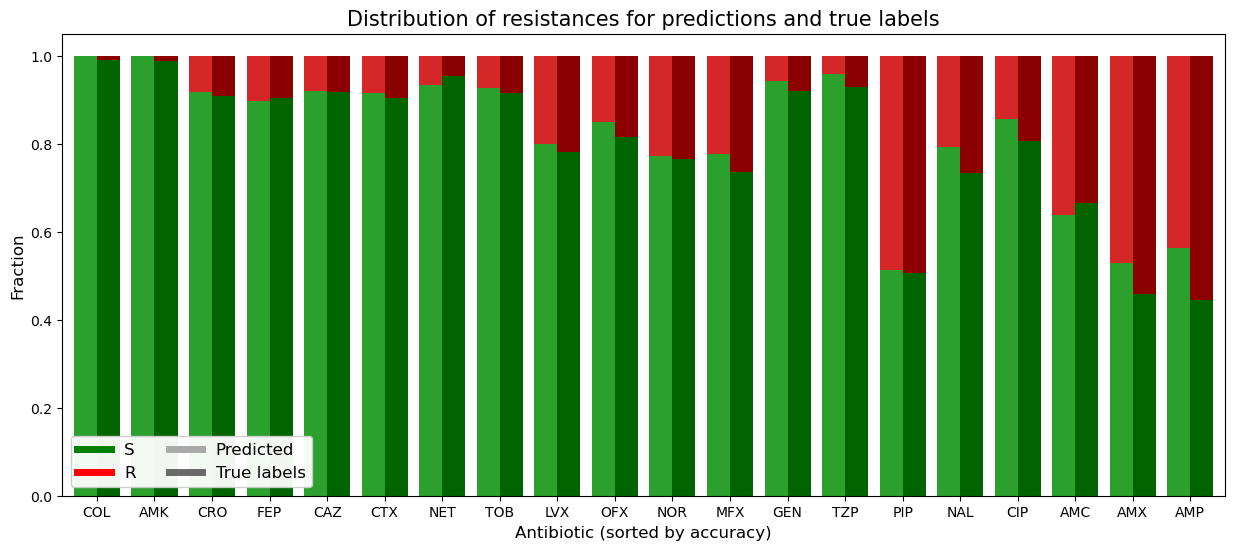

In [6]:
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar_pred = sorted_ab_stats[['S_frac_pred', 'R_frac_pred']].plot.bar(
    rot=0, stacked=True, width=-0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
bar_true = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['darkgreen', 'darkred'], ax=ax
)
ax.set_title('Distribution of resistances for predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)

from matplotlib.lines import Line2D

S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
ax.legend([S_line, R_line, pred_line, true_line], 
          ['S', 'R', 'Predicted', 'True labels'], 
          loc='lower left', ncol=2, fontsize=12, framealpha=0.95
)
plt.show()

**Fig 3**: Combining Fig 1 and Fig 2 into one plot

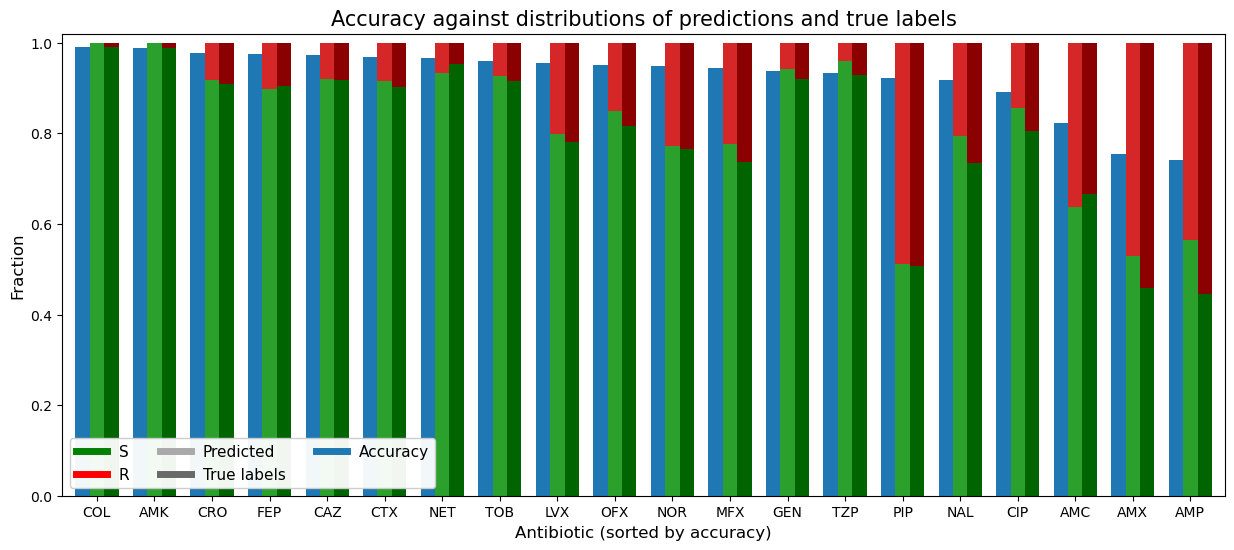

In [7]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats.set_index('antibiotic', inplace=True)

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

#### Isolate stats

In [8]:
iso_stats.head(n=20)

,year,country,gender,age,num_phenotypes,num_R,num_S,num_masked,num_masked_S,num_masked_R,correct_S,correct_R,correct_all,accuracy_S,accuracy_R
0,2019,IE,M,74.0,7,5,2,3,1,2,1,2,True,1.0,1.000000
1,2018,PT,M,87.0,10,3,7,5,3,2,3,1,False,1.0,0.500000
2,2013,AT,F,3.0,6,1,5,1,1,0,1,0,True,1.0,NaN
3,2020,NO,M,72.0,9,0,9,3,3,0,3,0,True,1.0,NaN
4,2004,NL,F,65.0,4,0,4,1,1,0,1,0,True,1.0,NaN
5,2017,FI,F,64.0,5,0,5,1,1,0,1,0,True,1.0,NaN
6,2009,BE,M,16.0,4,3,1,1,0,1,0,1,True,NaN,1.000000
7,2011,BE,M,70.0,7,0,7,1,1,0,1,0,True,1.0,NaN
8,2020,IT,F,69.0,8,2,6,1,1,0,1,0,True,1.0,NaN
9,2018,IT,M,94.0,6,2,4,1,1,0,1,0,True,1.0,NaN


In [9]:
df_stats = iso_stats.copy()

**Fig 1**: Compare correctly classified isolates for different sequence lengths

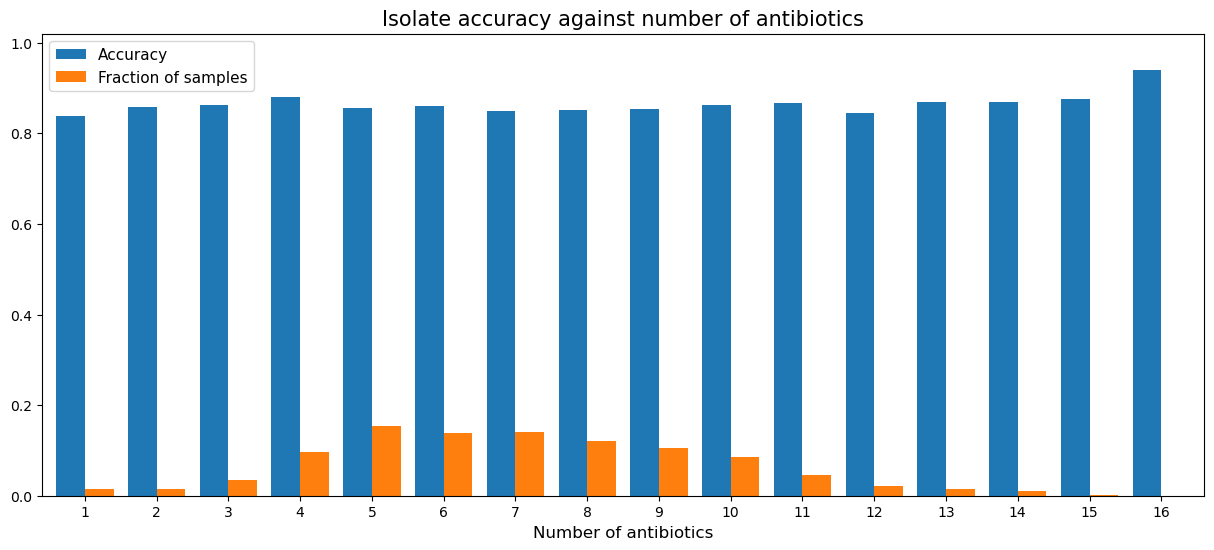

In [10]:
df_tmp = df_stats.groupby('num_phenotypes').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of antibiotics', fontsize=15)
ax.set_xlabel('Number of antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper left', fontsize=11)
plt.show()

**Fig 2**: Compare correctly classified isolates for different number of masked tests

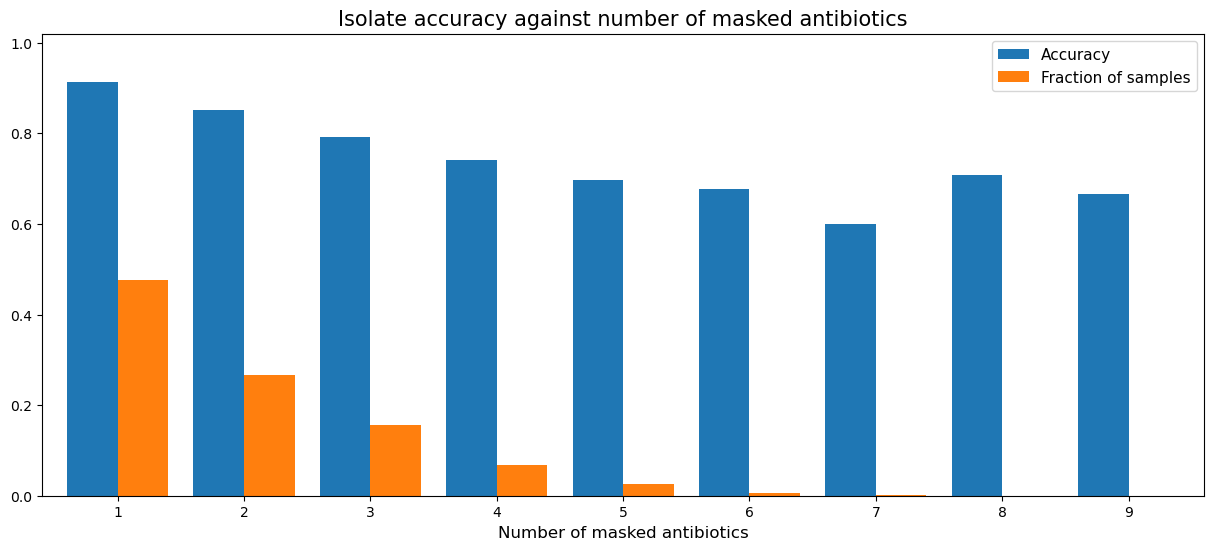

In [11]:
df_tmp = df_stats.groupby('num_masked').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['accuracy'] > 0]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of masked antibiotics', fontsize=15)
ax.set_xlabel('Number of masked antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

**Fig 3**: Compare isolate accuracy against fraction of antibiotics that are resistant

       accuracy  count     share
num_R                           
0      0.967389  69424  0.482446
1      0.764689  34635  0.240688
2      0.759905  15927  0.110681
3      0.734534   9052  0.062905
4      0.721477   5364  0.037276
5      0.753308   3628  0.025212
6      0.760508   2284  0.015872
7      0.773427   1558  0.010827
8      0.774869    955  0.006637
9      0.795876    485  0.003370
10     0.850000    300  0.002085
11     0.770186    161  0.001119
12     0.854167     96  0.000667
13     0.880000     25  0.000174
14     0.500000      6  0.000042


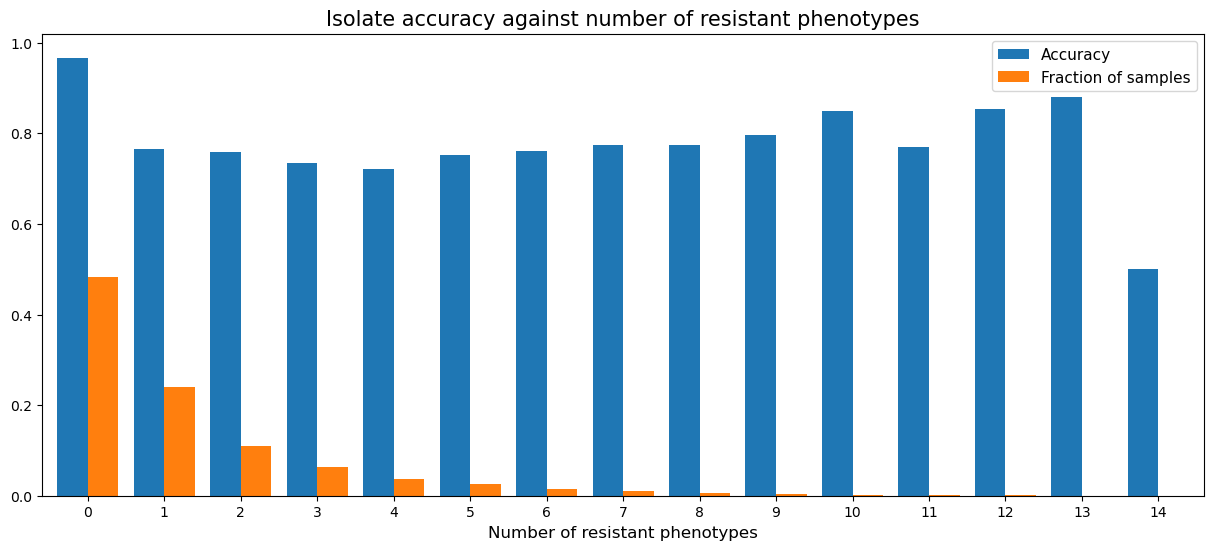

In [12]:
df_tmp = df_stats.groupby('num_R').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['accuracy'] > 0]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
print(df_tmp)
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of resistant phenotypes', fontsize=15)
ax.set_xlabel('Number of resistant phenotypes', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_28864\1344948287.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_28864\1344948287.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


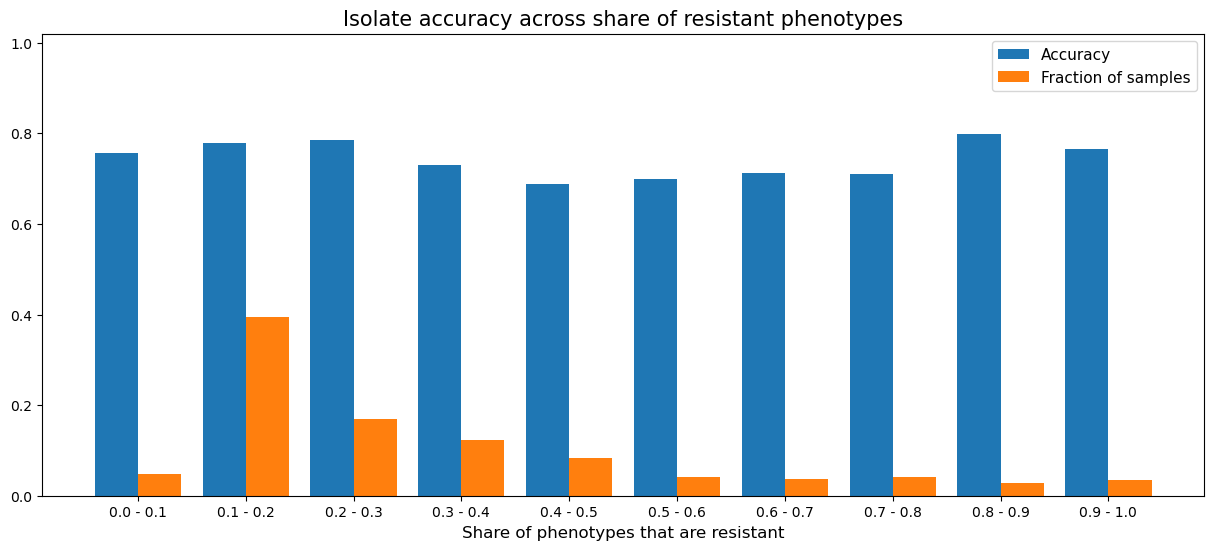

In [13]:
df_tmp = df_stats.copy()
df_tmp['frac_R'] = df_tmp['num_R'] / df_tmp['num_phenotypes']
bins = np.linspace(0, 1, 11)
df_tmp['frac_R_bin'] = pd.cut(df_tmp['frac_R'], bins=bins)
df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')

ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across share of resistant phenotypes', fontsize=15)
ax.set_xlabel('Share of phenotypes that are resistant', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

**Fig 4**: Isolate accuracy across countries

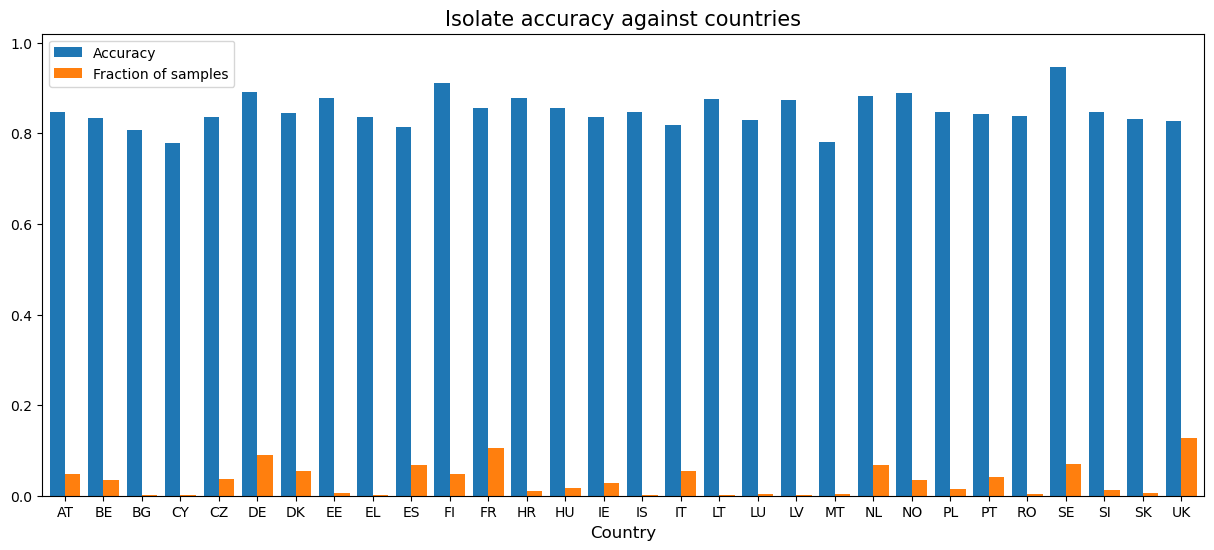

In [14]:
df_tmp = df_stats.groupby('country').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against countries', fontsize=15)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper left', fontsize=10)
plt.show()